## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv(r"G:\10AMOCT2019\models\LR - Copy\Case study\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,1,Yes,One year,No,Mailed check,18.80,18.80,No
1,8992-CEUEN,1,Yes,Month-to-month,No,Electronic check,18.85,18.85,No
2,9318-NKNFC,1,Yes,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,1,Yes,Month-to-month,No,Mailed check,18.90,18.90,No
4,1423-BMPBQ,1,Yes,Month-to-month,Yes,Mailed check,19.00,19.00,No


In [4]:
churn_data.shape

(7032, 9)

In [5]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [7]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [9]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,2967-MXRAV,1,Yes,One year,No,Mailed check,18.80,18.80,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1,8992-CEUEN,1,Yes,Month-to-month,No,Electronic check,18.85,18.85,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2,9318-NKNFC,1,Yes,Month-to-month,Yes,Mailed check,18.85,18.85,Yes,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,9975-SKRNR,1,Yes,Month-to-month,No,Mailed check,18.90,18.90,No,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4,1423-BMPBQ,1,Yes,Month-to-month,Yes,Mailed check,19.00,19.00,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7032, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.162400
std,24.545260,30.085974,2266.771362,0.368844
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
dtypes: float64(2), int64(2), ob

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [13]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,2967-MXRAV,1,1,One year,0,Mailed check,18.80,18.80,0,Male,...,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1,8992-CEUEN,1,1,Month-to-month,0,Electronic check,18.85,18.85,0,Female,...,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2,9318-NKNFC,1,1,Month-to-month,1,Mailed check,18.85,18.85,1,Male,...,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,9975-SKRNR,1,1,Month-to-month,0,Mailed check,18.90,18.90,0,Male,...,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4,1423-BMPBQ,1,1,Month-to-month,1,Mailed check,19.00,19.00,0,Female,...,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

#dummy1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,2967-MXRAV,1,1,One year,0,Mailed check,18.80,18.80,0,Male,...,No internet service,No internet service,1,0,0,0,1,1,0,1
1,8992-CEUEN,1,1,Month-to-month,0,Electronic check,18.85,18.85,0,Female,...,No internet service,No internet service,0,0,0,1,0,0,0,1
2,9318-NKNFC,1,1,Month-to-month,1,Mailed check,18.85,18.85,1,Male,...,No internet service,No internet service,0,0,0,0,1,1,0,1
3,9975-SKRNR,1,1,Month-to-month,0,Mailed check,18.90,18.90,0,Male,...,No internet service,No internet service,0,0,0,0,1,1,0,1
4,1423-BMPBQ,1,1,Month-to-month,1,Mailed check,19.00,19.00,0,Female,...,No internet service,No internet service,0,0,0,0,1,0,0,1


In [17]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

In [18]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [19]:
#telecom.head()
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
sm1.head()


,StreamingMovies_No,StreamingMovies_Yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### Dropping the repeated variables

In [20]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [21]:
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,2967-MXRAV,1,1,0,18.80,18.80,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,8992-CEUEN,1,1,0,18.85,18.85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9318-NKNFC,1,1,1,18.85,18.85,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9975-SKRNR,1,1,0,18.90,18.90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1423-BMPBQ,1,1,1,19.00,19.00,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,8879-XUAHX,71,1,1,116.25,8564.75,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
7028,9788-HNGUT,72,1,1,116.95,8594.40,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
7029,9739-JLPQJ,72,1,0,117.50,8670.10,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
7030,7569-NMZYQ,72,1,1,118.75,8672.45,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1


In [22]:
#The varaible was imported as a string we need to convert it to float
#telecom['TotalCharges'] = telecom[['TotalCharges']].convert_objects(convert_numeric=True)

In [23]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 34 columns):
customerID                               7032 non-null object
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7032 non-null int64
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
Contract_One year                        7032 non-null uint8
Contract_Two year                        7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check        

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [24]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [25]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [26]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecur

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [27]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecu

In [28]:
# Removing NaN TotalCharges rows
#telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [29]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecu

Now we don't have any missing values

### Step 4: Test-Train Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,1,0,18.80,18.80,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,18.85,18.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,18.85,18.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,18.90,18.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,19.00,19.00,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
939,6,1,0,19.85,138.85,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3724,18,1,1,85.20,1553.90,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1756,5,1,1,85.40,401.10,0,1,0,0,0,...,0,1,1,0,0,1,1,0,1,0
2278,7,1,1,95.60,644.35,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
1867,5,1,1,83.15,446.05,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0


### Step 5: Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,-1.154118,0,1,-1.160212,-0.956932,1,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
5781,1.616832,1,0,0.002140,1.125931,0,1,0,0,1,...,0,1,1,0,0,1,1,0,1,0
6489,0.924095,1,1,1.728158,1.827167,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
878,-1.235617,1,1,-0.271355,-0.956932,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2779,-0.828124,1,1,0.475753,-0.597337,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [37]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

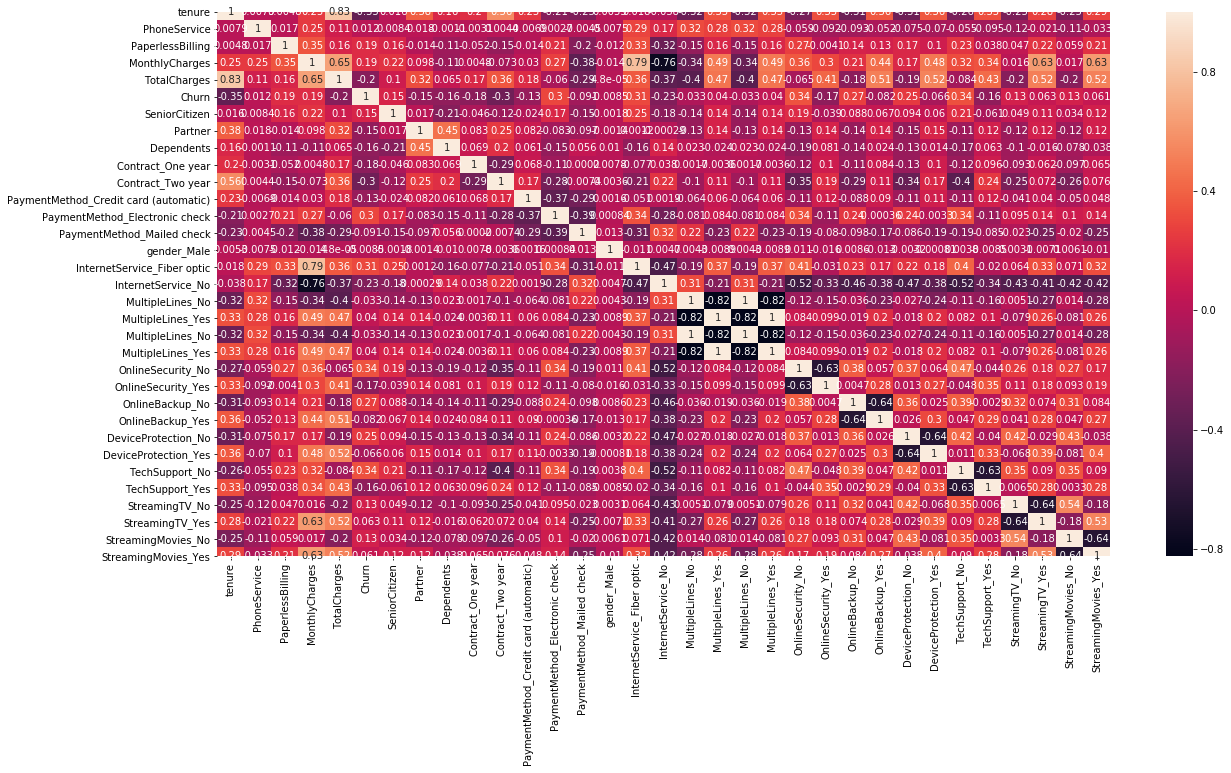

In [135]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [40]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

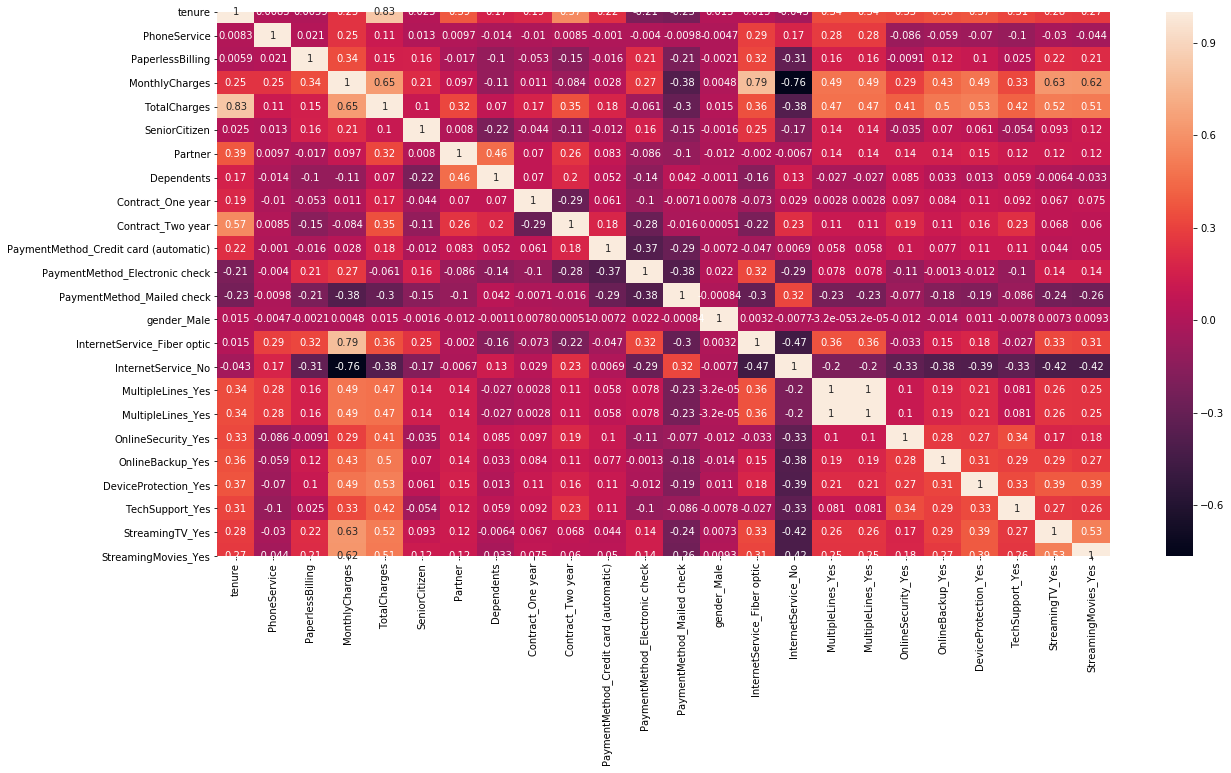

In [41]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [42]:
import statsmodels.api as sm

In [43]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())


In [44]:
log_trained=logm1.fit()

In [45]:
log_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.4
Date:                Sat, 01 Feb 2020   Deviance:                       4094.8
Time:                        20:59:48   Pearson chi2:                 5.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2628      1.528     -2.136      0.033      -6.257      -0.269
tenure                                   -1.4711      0.184     -7.993      0.000      -1.832      -1.110
PhoneService                              0.5631      0.779      0.723      0.470      -0.963       2.090
PaperlessBilling                          0.2776      0.089      3.122      0.002       0.103       0.452
MonthlyCharges                           -1.6382      1.145     -1.431      0.152      -3.882       0.605
TotalCharges                              0.6987      0.191      3.651      0.000       0.324       1.074
SeniorCitizen                             0.2245      0.102      2.203      0.028       0.025       0.424
Partner                                   0.0128      0.093      0.137      0.891      -0.170       0.196
Dependents                               -0.1524      0.108     -1.410      0.159      -0.364       0.059
Contract_One year                        -0.7193      0.129     -5.573      0.000      -0.972      -0.466
Contract_Two year                        -1.2990      0.207     -6.276      0.000      -1.705      -0.893
PaymentMethod_Credit card (automatic)    -0.0480      0.136     -0.354      0.723      -0.314       0.218
PaymentMethod_Electronic check            0.3621      0.113      3.202      0.001       0.140       0.584
PaymentMethod_Mailed check               -0.0568      0.138     -0.413      0.680      -0.327       0.213
gender_Male                              -0.0641      0.077     -0.828      0.408      -0.216       0.088
InternetService_Fiber optic               2.0511      0.960      2.136      0.033       0.169       3.933
InternetService_No                       -2.1373      0.969     -2.206      0.027      -4.036      -0.238
MultipleLines_Yes                         0.2662      0.106      2.511      0.012       0.058       0.474
MultipleLines_Yes                         0.2662      0.106      2.511      0.012       0.058       0.474
OnlineSecurity_Yes                       -0.1963      0.216     -0.908      0.364      -0.620       0.227
OnlineBackup_Yes                          0.1396      0.212      0.658      0.511      -0.276       0.555
DeviceProtection_Yes                      0.2098      0.211      0.992      0.321      -0.205       0.624
TechSupport_Yes                          -0.0639      0.218     -0.294      0.769      -0.490       0.362
StreamingTV_Yes                           0.7484      0.392      1.909      0.056      -0.020       1.517
StreamingMovies_Yes                       0.7031      0.392      1.793      0.073      -0.065       1.472
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [48]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True])

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 5),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 10),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 9),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 8),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('MultipleLines_Yes', False, 3),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]

In [51]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

In [52]:
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Sat, 01 Feb 2020   Deviance:                       4102.6
Time:                        20:59:50   Pearson chi2:                 5.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2892      0.167     -7.726      0.000      -1.616      -0.962
tenure                            -1.4436      0.179     -8.057      0.000      -1.795      -1.092
PhoneService                      -0.5188      0.157     -3.305      0.001      -0.826      -0.211
PaperlessBilling                   0.2815      0.089      3.181      0.001       0.108       0.455
TotalCharges                       0.6307      0.185      3.412      0.001       0.268       0.993
SeniorCitizen                      0.2498      0.100      2.503      0.012       0.054       0.445
Contract_One year                 -0.7379      0.128     -5.751      0.000      -0.989      -0.486
Contract_Two year                 -1.3175      0.206     -6.396      0.000      -1.721      -0.914
PaymentMethod_Electronic check     0.3984      0.082      4.859      0.000       0.238       0.559
InternetService_Fiber optic        0.7117      0.116      6.135      0.000       0.484       0.939
InternetService_No                -0.7409      0.158     -4.682      0.000      -1.051      -0.431
MultipleLines_Yes                  0.1336      0.048      2.808      0.005       0.040       0.227
MultipleLines_Yes                  0.1336      0.048      2.808      0.005       0.040       0.227
OnlineSecurity_Yes                -0.4690      0.102     -4.582      0.000      -0.670      -0.268
TechSupport_Yes                   -0.3429      0.102     -3.348      0.001      -0.544      -0.142
StreamingTV_Yes                    0.1979      0.097      2.039      0.041       0.008       0.388
StreamingMovies_Yes                0.1635      0.097      1.691      0.091      -0.026       0.353
==================================================================================================
"""

In [54]:
X_train_sm.columns

Index(['const', 'tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [55]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

877     0.668895
5781    0.004996
6489    0.370197
878     0.542605
2779    0.549998
3867    0.003011
5378    0.504194
6614    0.073261
4457    0.516958
5355    0.015509
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66889487, 0.00499626, 0.37019687, 0.54260517, 0.54999793,
       0.0030112 , 0.50419431, 0.07326064, 0.51695802, 0.01550863])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.668895,877
1,0,0.004996,5781
2,0,0.370197,6489
3,0,0.542605,878
4,1,0.549998,2779


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(50)

,Churn,Churn_Prob,CustID,predicted
0,0,0.668895,877,1
1,0,0.004996,5781,0
2,0,0.370197,6489,0
3,0,0.542605,878,1
4,1,0.549998,2779,1
5,0,0.003011,3867,0
6,0,0.504194,5378,1
7,0,0.073261,6614,0
8,0,0.516958,4457,1
9,0,0.015509,5355,0


In [59]:
from sklearn import metrics

In [60]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3242  371]
 [ 596  713]]


In [61]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8035351483136937


#### Checking VIFs

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,MultipleLines_Yes,inf
11,MultipleLines_Yes,inf
1,PhoneService,8.61
3,TotalCharges,7.79
0,tenure,6.82
8,InternetService_Fiber optic,4.06
6,Contract_Two year,3.34
9,InternetService_No,3.22
2,PaperlessBilling,2.74
14,StreamingTV_Yes,2.67


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [65]:
col = col.drop('MultipleLines_Yes', 1)
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.2
Date:                Sat, 01 Feb 2020   Deviance:                       4110.5
Time:                        20:59:52   Pearson chi2:                 5.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2510      0.166     -7.527      0.000      -1.577      -0.925
tenure                            -1.4540      0.179     -8.106      0.000      -1.806      -1.102
PhoneService                      -0.4502      0.155     -2.903      0.004      -0.754      -0.146
PaperlessBilling                   0.2915      0.088      3.296      0.001       0.118       0.465
TotalCharges                       0.7019      0.183      3.829      0.000       0.343       1.061
SeniorCitizen                      0.2605      0.099      2.618      0.009       0.066       0.455
Contract_One year                 -0.7566      0.128     -5.902      0.000      -1.008      -0.505
Contract_Two year                 -1.3319      0.206     -6.458      0.000      -1.736      -0.928
PaymentMethod_Electronic check     0.4041      0.082      4.936      0.000       0.244       0.565
InternetService_Fiber optic        0.7442      0.116      6.436      0.000       0.518       0.971
InternetService_No                -0.7616      0.158     -4.816      0.000      -1.072      -0.452
OnlineSecurity_Yes                -0.4735      0.102     -4.632      0.000      -0.674      -0.273
TechSupport_Yes                   -0.3607      0.102     -3.532      0.000      -0.561      -0.161
StreamingTV_Yes                    0.2021      0.097      2.084      0.037       0.012       0.392
StreamingMovies_Yes                0.1630      0.097      1.687      0.092      -0.026       0.352
==================================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [68]:
y_train_pred[:10]

array([0.67072412, 0.00437346, 0.37024827, 0.49392619, 0.51247418,
       0.0023971 , 0.48556286, 0.09286148, 0.55368611, 0.01663467])

In [69]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [70]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.670724,877,1
1,0,0.004373,5781,0
2,0,0.370248,6489,0
3,0,0.493926,878,0
4,1,0.512474,2779,1


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.804754164973588


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.79
3,TotalCharges,7.63
0,tenure,6.81
8,InternetService_Fiber optic,4.02
6,Contract_Two year,3.34
9,InternetService_No,3.22
2,PaperlessBilling,2.73
12,StreamingTV_Yes,2.67
13,StreamingMovies_Yes,2.63
11,TechSupport_Yes,1.96


In [73]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('PhoneService')
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [74]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.4
Date:                Sat, 01 Feb 2020   Deviance:                       4118.9
Time:                        20:59:53   Pearson chi2:                 5.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5721      0.125    -12.548      0.000      -1.818      -1.327
tenure                            -1.3483      0.176     -7.676      0.000      -1.693      -1.004
PaperlessBilling                   0.2915      0.088      3.302      0.001       0.118       0.465
TotalCharges                       0.5899      0.180      3.283      0.001       0.238       0.942
SeniorCitizen                      0.2717      0.099      2.732      0.006       0.077       0.467
Contract_One year                 -0.7626      0.128     -5.955      0.000      -1.014      -0.512
Contract_Two year                 -1.3317      0.206     -6.465      0.000      -1.735      -0.928
PaymentMethod_Electronic check     0.4118      0.082      5.037      0.000       0.252       0.572
InternetService_Fiber optic        0.6243      0.107      5.839      0.000       0.415       0.834
InternetService_No                -0.8949      0.150     -5.950      0.000      -1.190      -0.600
OnlineSecurity_Yes                -0.4840      0.102     -4.740      0.000      -0.684      -0.284
TechSupport_Yes                   -0.3648      0.102     -3.575      0.000      -0.565      -0.165
StreamingTV_Yes                    0.2211      0.097      2.286      0.022       0.032       0.411
StreamingMovies_Yes                0.1903      0.096      1.980      0.048       0.002       0.379
==================================================================================================
"""

In [75]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [76]:
y_train_pred[:10]

array([0.5973489 , 0.00512564, 0.35929528, 0.52312121, 0.5089044 ,
       0.00285289, 0.48505912, 0.09133834, 0.55893975, 0.01366643])

In [77]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [78]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.597349,877,1
1,0,0.005126,5781,0
2,0,0.359295,6489,0
3,0,0.523121,878,1
4,1,0.508904,2779,1


In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.802519301097115


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.62
0,tenure,6.70
5,Contract_Two year,3.16
7,InternetService_Fiber optic,2.91
11,StreamingTV_Yes,2.66
12,StreamingMovies_Yes,2.62
1,PaperlessBilling,2.54
8,InternetService_No,2.26
10,TechSupport_Yes,1.88
6,PaymentMethod_Electronic check,1.85


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [81]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3242,  371],
       [ 601,  708]], dtype=int64)

In [82]:
conf=[[3261,  374],
       [ 585,  702]]
conf[0][0]

3261

In [83]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.802519301097115

In [85]:
confusion

array([[3242,  371],
       [ 601,  708]], dtype=int64)

## Metrics beyond simply accuracy

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print (FP)

371


In [87]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5408708938120703

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.897315250484362

In [89]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10268474951563797


In [90]:
# positive predictive value 
print (TP / float(TP+FP))

0.6561631139944393


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8436117616445485


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

The 45
 Diagonal

For a completely random model, the ROC curve will pass through the 45-degree line that has been shown in the graph above and in the best case it passes through the upper left corner of the graph. So the least area that an ROC curve can have is 0.5, and the highest area it can have is 1.

 

The Sensitivity vs Specificity Trade-off

As you saw in the last segment as well, the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 
 

Area Under the Curve

By determining the Area under the curve (AUC) of a ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model which is something you saw in the last segment as well.

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

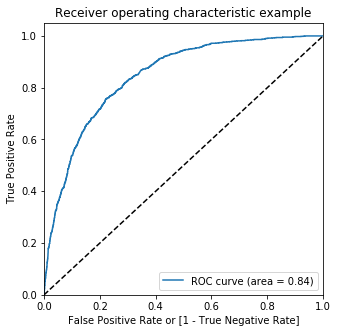

In [94]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.597349,877,1,1,1,1,1,1,1,0,0,0,0
1,0,0.005126,5781,0,1,0,0,0,0,0,0,0,0,0
2,0,0.359295,6489,0,1,1,1,1,0,0,0,0,0,0
3,0,0.523121,878,1,1,1,1,1,1,1,0,0,0,0
4,1,0.508904,2779,1,1,1,1,1,1,1,0,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.265949  1.000000  0.000000
0.1   0.1  0.610727  0.947288  0.488790
0.2   0.2  0.699512  0.872422  0.636867
0.3   0.3  0.761885  0.770817  0.758649
0.4   0.4  0.792361  0.668449  0.837254
0.5   0.5  0.802519  0.540871  0.897315
0.6   0.6  0.793377  0.375859  0.944644
0.7   0.7  0.770622  0.184110  0.983117
0.8   0.8  0.736896  0.012223  0.999446
0.9   0.9  0.734051  0.000000  1.000000


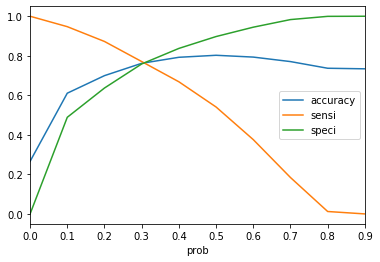

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.597349,877,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.005126,5781,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.359295,6489,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.523121,878,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.508904,2779,1,1,1,1,1,1,1,0,0,0,0,1


In [99]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7618854124339699

In [100]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2741,  872],
       [ 300, 1009]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7708174178762414

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.7586493218931636

In [104]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2413506781068364


In [105]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5364167995746943


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9013482407102926


## Precision and Recall

In [107]:
#Looking at the confusion matrix again

In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3242,  371],
       [ 601,  708]], dtype=int64)

##### Precision
TP / TP + FP

In [109]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6561631139944393

##### Recall
TP / TP + FN

In [110]:
l1= [1,2,3]
l2=[1,1,3]
tp = 0 
for i, j in zip(l1, l2):
    if i == j:
        if i ==1 :
            tp = tp+1
tp

1

In [111]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5408708938120703

Using sklearn utilities for the same

In [112]:
from sklearn.metrics import precision_score, recall_score

In [113]:
?precision_score

In [114]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6561631139944393

In [115]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5408708938120703

### Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4917    1
 4918    1
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 4917    0
 4918    1
 4919    1
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

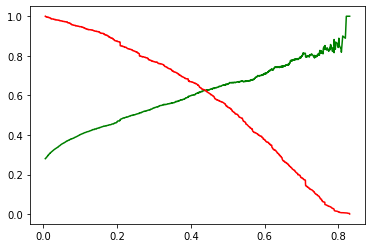

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [120]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [121]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
939,-1.072620,0,-0.947777,0,0,0,0,0,1,0,0,0,0
3724,-0.583629,1,-0.318873,0,0,0,1,1,0,0,0,1,0
1756,-1.113369,1,-0.831223,0,0,0,1,1,0,0,1,0,0
2278,-1.031871,1,-0.723113,1,0,0,0,1,0,0,0,1,1
1867,-1.113369,1,-0.811245,1,0,0,0,1,0,0,0,1,0


In [122]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [123]:
y_test_pred = res.predict(X_test_sm)

In [124]:
y_test_pred[:10]

939     0.170814
3724    0.639982
1756    0.599021
2278    0.729365
1867    0.702450
1965    0.098799
2527    0.040328
1611    0.625542
2480    0.014539
5905    0.050066
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head
y_pred_1.head()

,0
939,0.170814
3724,0.639982
1756,0.599021
2278,0.729365
1867,0.702450


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

,Churn,CustID,0
0,0,939,0.170814
1,1,3724,0.639982
2,1,1756,0.599021
3,1,2278,0.729365
4,1,1867,0.702450


In [132]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [133]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)